### 奇异值分解

参考 https://nbviewer.jupyter.org/github/zlotus/notes-linear-algebra/blob/master/chapter30.ipynb


In [17]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

shape (601, 500, 3)


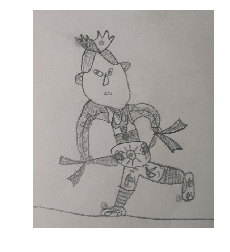

In [18]:
dong = mpimg.imread('./resources/dong.jpg') # 读取彩色图片
print('shape',dong.shape)
plt.imshow(dong) # 显示图片
plt.axis('off') 
plt.show()

In [19]:
# 查看第一通道 热量图，三个通道的效果类似
# dong_1 = dong[:,:,0]
# plt.imshow(dong_1)
# plt.show()
# # 灰度图：
# plt.imshow(dong_1, cmap='Greys_r')
# plt.show()

In [20]:
#抽取三个通道，分别进行奇异值分解
u_r, sigma_r, vt_r = np.linalg.svd(dong[:, :, 0])
u_g, sigma_g, vt_g = np.linalg.svd(dong[:, :, 1])
u_b, sigma_b, vt_b = np.linalg.svd(dong[:, :, 2])

In [21]:
print(u_r.shape,sigma_r.shape,vt_r.shape)
print(u_g.shape,sigma_g.shape,vt_g.shape)
print(u_b.shape,sigma_b.shape,vt_b.shape)

(601, 601) (500,) (500, 500)
(601, 601) (500,) (500, 500)
(601, 601) (500,) (500, 500)


In [22]:
#总体还原图
r=np.dot(u_r[:,:len(sigma_r)],np.diag(sigma_r)).dot(vt_r)
g=np.dot(u_g[:,:len(sigma_g)],np.diag(sigma_g)).dot(vt_g)
b=np.dot(u_b[:,:len(sigma_b)],np.diag(sigma_b)).dot(vt_b)
colo=np.stack((r,g,b),axis=2)
colo[colo<0]=0
colo[colo>255]=255
# 可以显示原图
# plt.imshow(np.rint(colo).astype('uint8'))
# plt.axis('off')

In [23]:
#取前个奇异值还原矩阵，此时矩阵相当于压缩了 k/len(sig)
def restore(u, sig, v, k):
    m = len(u)
    n = len(v)
    a = np.zeros((m, n))
    # 重构图像
    a = np.dot(u[:, :k], np.diag(sig[:k])).dot(v[:k, :])
    a[a < 0] = 0
    a[a > 255] = 255
    return np.rint(a).astype('uint8')

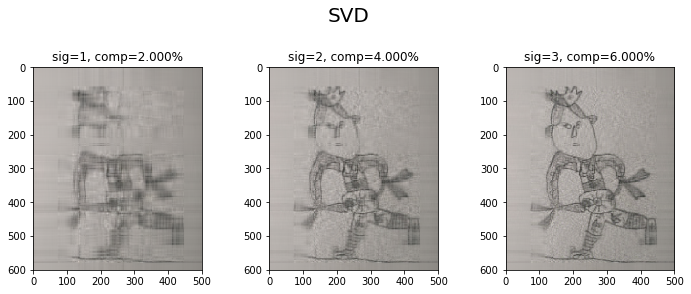

In [24]:
plt.figure(facecolor = 'w', figsize = (10, 10))
# 奇异值个数：10,20,...,90
K = 3 # 为了文件大小，选择了3
sigl=len(sigma_r)
for k in range(1, K + 1):
    R = restore(u_r, sigma_r, vt_r, k*10)
    G = restore(u_g, sigma_g, vt_g, k*10)
    B = restore(u_b, sigma_b, vt_b, k*10)
    I = np.stack((R, G, B), axis = 2)
    # 将图片重构后的显示出来
    plt.subplot(3, 3, k)
    plt.imshow(I)
    plt.axis('on')
    plt.title('sig=%d, comp=%0.3f%%' %  (k, (10.0*k*100/sigl)) )
 
plt.suptitle('SVD', fontsize = 20)
plt.tight_layout(0.1, rect = (0, 0, 1, 0.92))
plt.show()

# 即使在sig=1的情况下，也能识别出轮廓信息，说明这张图的信息熵比较低，此时压缩比 0.6%
# 可以看到sigcount=120,已经能看清了清楚了，此时的压缩比率为6.7%